## <center> Python Geospatial Data Analysis

In [1]:
import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster,HeatMap
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

### Base Map

In [4]:
boston = (42.358443,-71.05977)
m = folium.Map(location=boston,tile="Stamen terrain", zoom_start=12)
m

In [5]:
mc = MarkerCluster()
for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'],row['Long']]))

m.add_child(mc)

### Districts with Highest Crime Rates

In [6]:
crime = df.groupby(['DISTRICT','STREET','REPORTING_AREA','Lat','Long']).sum().reset_index()

In [7]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports: {}'.format))

In [8]:
m2 = folium.Map(location=boston,tiles='stamentoner',zoom_start=12)
HeatMap(data=crime[['Lat','Long']],radius=15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location=[point.Lat,point.Long],
                       readius=5,
                        weight=2,
                        popup=[point.DISTRICT,point.REPORTING_AREA],
                        fill_color='#000000').add_to(m2)
crime.apply(plotDot,axis=1)
m2.fit_bounds(m2.get_bounds())
m2

### Medical Assistance Analysis

In [9]:
med = df.loc[df.OFFENSE_CODE_GROUP=='Medical Assistance'][['Lat','Long']]
med.Lat.fillna(0,inplace=True)
med.Long.fillna(0,inplace=True)
m6 = folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=med,radius=16).add_to(m6)
m6

### Crimes Commited

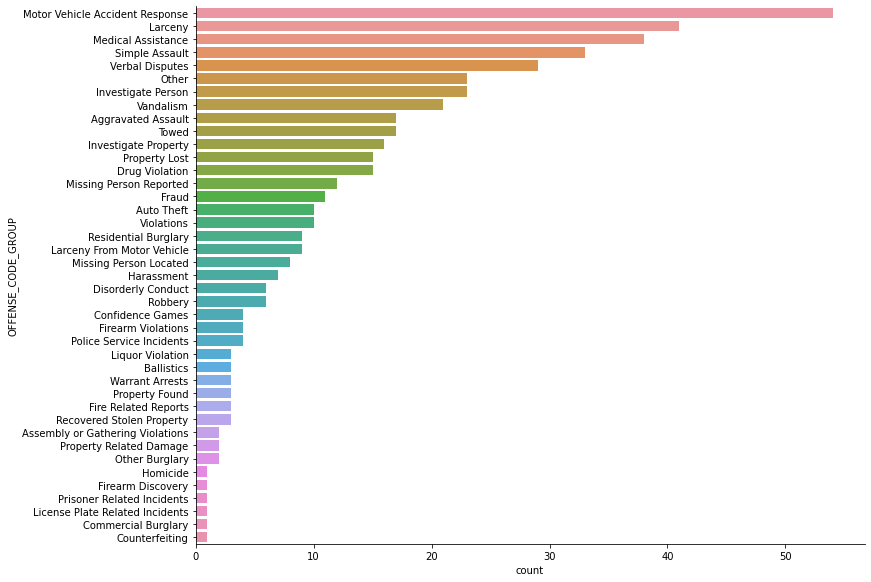

In [10]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
           height=8,
           aspect=1.5,
           order=df.OFFENSE_CODE_GROUP.value_counts().index,
           data=df)

### Motor Vehicle Accident Response

In [11]:
mv = df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat','Long']]
mv.fillna(0, inplace=True)
mv.Lat.fillna(0, inplace=True)
mv.Long.fillna(0, inplace=True)
m4 = folium.Map(location=boston, tiles='openstreetmap',zoom_start=11)
HeatMap(data=mv, radius=12).add_to(m4)
m4

### Larceny

In [12]:
lar = df.loc[df.OFFENSE_CODE_GROUP == "Larceny"][['Lat','Long']]
lar.Lat.fillna(0, inplace=True)
lar.Long.fillna(0, inplace =True)
m5 = folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=lar,radius=16).add_to(m5)
m5